relevant matplotlib issues:

* https://github.com/matplotlib/matplotlib/pull/1312
* https://github.com/matplotlib/matplotlib/issues/1325


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import proj3d, Axes3D

%matplotlib inline


# Representing a 3D trajectory

In [2]:
### Create some data - supposed to be x, y, z coordinates
data = np.random.normal(scale=0.2, size=(3, 100)).cumsum(axis=1)
# put some anisotropy along z to ease orientation
data[2, :] /= 3. 


## The Idea

I'm drawing a 2 by 2 plot with three 2D axes and one 3DAxes in the lower left corner like so:
```
        y|     y|
         |___   |___
           x      z
        z|     z| y
         |___   |/__
           x      x
```

Coordinates need to be shared between the three 2D plots, but not with the 3D plot (that doesn't make sense). We also want an `equal` aspect ratio.

### The following doesn't work well

* Zooming and panning behave erratically
* the 3D plot aspect ratio is not 'equal'
* the 3D plot shares axes with the others

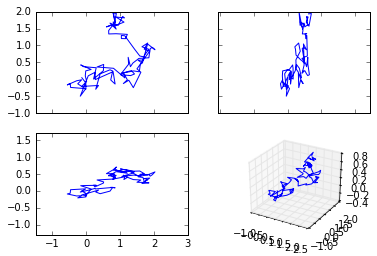

In [3]:
fig, axes = plt.subplots(2, 2, sharex='col', sharey='row')
axes[1, 1].axis('off')
ax_3d = fig.add_subplot(224, projection='3d')
ax_3d.set_aspect('equal')
ax_3d.set_adjustable('box-forced')

for ax in axes.ravel():
    ax.set_aspect('equal')
    ### This makes things worst
    #ax.set_adjustable('box-forced')

data = np.random.normal(scale=0.2, size=(3, 100)).cumsum(axis=1)
# put some anisotropy along z to ease orientation
data[2, :] /= 3. 

axes[0, 0].plot(data[0, :], data[1, :]) #x, y
axes[0, 1].plot(data[2, :], data[1, :]) #z, y
axes[1, 0].plot(data[0, :], data[2, :]) #x, z

ax_3d.plot(data[0, :], data[1, :], data[2, :])
#ax_3d.bbox = ax_3d.bbox.shrunk(0.8, 0.8)



### This works - except for 3D `'equal'` aspect ratio

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax2 = fig.add_subplot(222, aspect='equal')
ax3 = fig.add_subplot(223, aspect='equal')
ax1 = fig.add_subplot(221, sharey=ax2, sharex=ax3)
ax_3d = fig.add_subplot(224, projection='3d')

axes = np.array([[ax1, ax2], [ax3, ax_3d]])


ax_3d.set_aspect('equal')

for ax in axes.ravel():
    ax.set_aspect('equal')
    ax.grid()
    ### This is rather messing things up
    #ax.set_adjustable('box-forced')

axes[0, 0].plot(data[0, :], data[1, :]) #x, y
axes[0, 1].plot(data[2, :], data[1, :]) #z, y
axes[1, 0].plot(data[0, :], data[2, :]) #x, z

ax_3d.plot(data[0, :], data[1, :], data[2, :])
#ax_3d.bbox = ax_3d.bbox.shrunk(0.8, 0.8)
